In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.pylab import plt

# make the fonts be rendered using latex
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [56]:
df = pd.read_csv('CSE 200-HW4-3 - Tidy.tsv', sep='\t')
df.replace("INDETERMINATE", np.nan, inplace=True)

for col in ['Mean', 'Min', 'Max']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
# make the data easier to use in the plotting code
df.replace(np.nan, np.inf, inplace=True)
df.replace(0, 0.0001, inplace=True)

In [85]:
def pattern(_df, y_label, title, ax):
    x1 = _df[(_df.Type == y_label) & (_df.Reduction == 1)].N
    y1 = _df[(_df.Type == y_label) & (_df.Reduction == 1)].Mean
    x2 = _df[(_df.Type == y_label) & (_df.Reduction == 2)].N
    y2 = _df[(_df.Type == y_label) & (_df.Reduction == 2)].Mean

    ax.semilogy(x1, y1, label='Method 1')
    ax.semilogy(x2, y2, label='Method 2')

    ax.set_ylabel(y_label)
    ax.set_xlabel('N')

    ax.set_title(title)

    ax.legend(loc=2)    

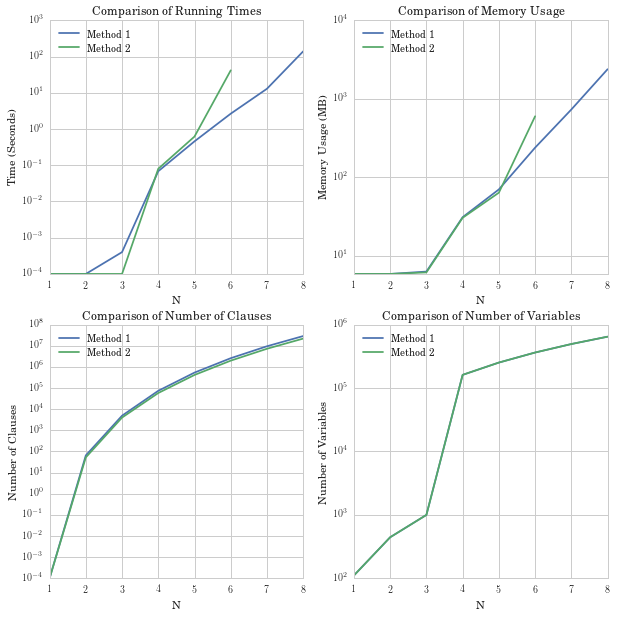

In [89]:
f, axarr = plt.subplots(2, 2)
f.set_size_inches(10, 10)
pattern(df, 'Time (Seconds)', 'Comparison of Running Times', axarr[0, 0])
_ = axarr[0, 0].set_ylim([0, 10**3])

pattern(df, 'Memory Usage (MB)', 'Comparison of Memory Usage', axarr[0, 1])
_ = axarr[0, 1].set_ylim([0, 10**4])

pattern(df, 'Number of Clauses', 'Comparison of Number of Clauses', axarr[1, 0])

pattern(df, 'Number of Variables', 'Comparison of Number of Variables', axarr[1, 1])

plt.savefig('comparisons.png', dpi=326)